In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [16]:
# file_path = 'BankRecords.csv'
# data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
# data.head()

In [17]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
data = pd.read_csv(filename)

# Display the first few rows of the DataFrame
print(data.head())


Saving BankRecords (1).csv to BankRecords (1) (3).csv
   ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No    

In [18]:
data.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [19]:
# Drop the ID column and rename Income column for convenience
data = data.drop('ID', axis=1)
data = data.rename(columns={'Income(Thousands\'s)': 'Income'})



In [20]:
# Separate features and target variable
X = data.drop('Income', axis=1)
y = data['Income']



In [21]:
# Define categorical and numerical columns
categorical_cols = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numerical_cols = X.columns.difference(categorical_cols)



In [22]:
# Preprocessing pipeline for numerical data
numerical_transformer = StandardScaler()

# Preprocessing pipeline for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)



In [137]:
# Define the Keras Sequential model with tuned hyperparameters
model = Sequential()
model.add(Dense(13, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with a tuned optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [138]:
# Train the model with a different batch size and more epochs
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

Epoch 1/200
63/63 [==============================] - 1s 5ms/step - loss: 6972.0479 - mean_absolute_error: 69.8367 - val_loss: 5529.7061 - val_mean_absolute_error: 59.4901
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 2994.8010 - mean_absolute_error: 40.7454 - val_loss: 1707.3300 - val_mean_absolute_error: 33.1338
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 1500.6265 - mean_absolute_error: 30.3104 - val_loss: 1320.4131 - val_mean_absolute_error: 29.1439
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 1261.9979 - mean_absolute_error: 27.6138 - val_loss: 1147.0710 - val_mean_absolute_error: 26.7367
Epoch 5/200
63/63 [==============================] - 0s 3ms/step - loss: 1153.1188 - mean_absolute_error: 26.2817 - val_loss: 1060.5270 - val_mean_absolute_error: 25.5318
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 1093.3239 - mean_absolute_error: 25.6026 - val_loss: 1010.7125 - val_mea

In [139]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test R²: {r2}')

32/32 [==============================] - 0s 1ms/step
Test MAE: 20.756695821762086
Test MSE: 702.4335959275153
Test R²: 0.6687447938016596


In [140]:
# Create a new customer with random values
new_customer = pd.DataFrame({
    'Age': [np.random.randint(18, 70)],
    'Experience(Years)': [np.random.randint(0, 50)],
    'Sort Code': [np.random.randint(90000, 99999)],
    'Family': [np.random.randint(1, 6)],
    'Credit Score': [np.random.uniform(0.0, 3.0)],
    'Education': [np.random.choice(['Diploma', 'Degree'])],
    'Mortgage(Thousands\'s)': [np.random.randint(0, 1000)],
    'Personal Loan': [np.random.choice(['Yes', 'No'])],
    'Securities Account': [np.random.choice(['Yes', 'No'])],
    'CD Account': [np.random.choice(['Yes', 'No'])],
    'Online Banking': [np.random.choice(['Yes', 'No'])],
    'CreditCard': [np.random.choice(['Yes', 'No'])]
})

# Preprocess the new customer data
new_customer_processed = preprocessor.transform(new_customer)

# Predict the income for the new customer
predicted_income = model.predict(new_customer_processed)
print(f'Predicted Income for the new customer: {predicted_income[0][0]}')


1/1 [==============================] - 0s 66ms/step
Predicted Income for the new customer: 175.76766967773438


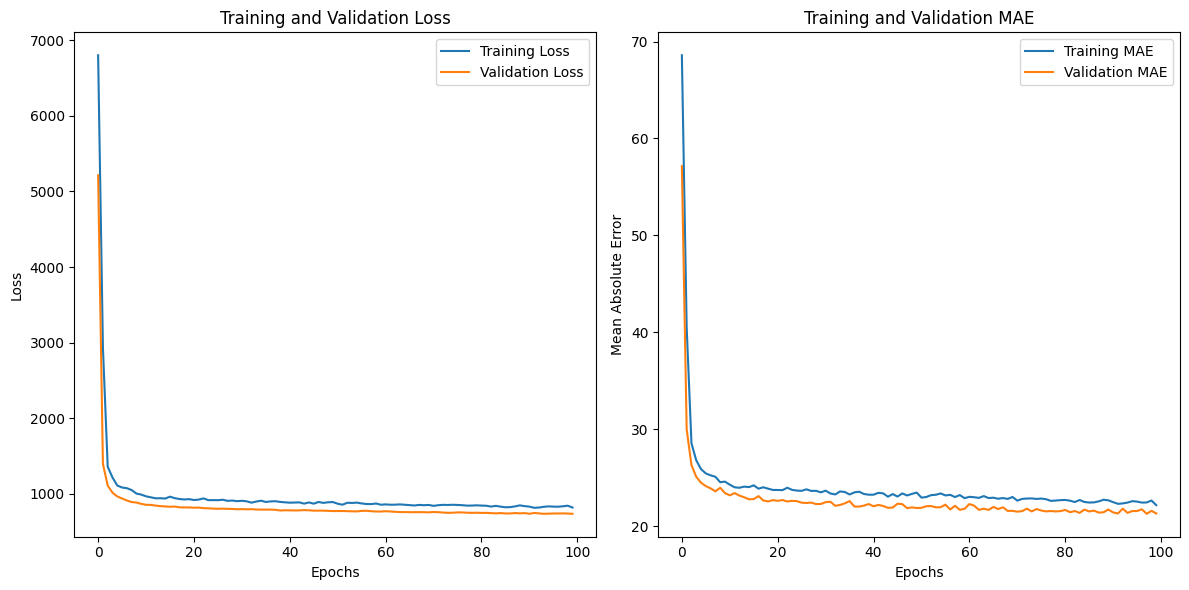

In [73]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()